In [1]:
import numpy as np

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
# 1. a) С помощью формул для парной регрессии
b1 = ((salary*scoring).mean() - salary.mean()*scoring.mean())/((salary**2).mean() - (salary.mean())**2)
b1

2.620538882402765

In [5]:
b0 = scoring.mean() - b1*salary.mean()
b0

444.1773573243596

In [6]:
scoring = scoring.reshape(-1, 1)
scoring

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [7]:
salary = salary.reshape(-1, 1)
salary

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
ones = np.ones((salary.shape[0], 1))
salary = np.hstack((ones, salary))
salary

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [9]:
# Произведение транспонированной матрицы на исходную + определитель получившейся матрицы
XTX = salary.T.dot(salary)

np.linalg.det(XTX)

349464.00000000023

In [10]:
# Определитель не равено 0 => аналитическое решение существует:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary.T).dot(scoring)

print(b)

[[444.17735732]
 [  2.62053888]]


Получили те же коэффициенты. :)

2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Text(0, 0.5, 'оценка')

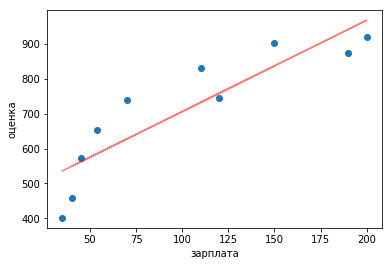

In [12]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x = salary
y = b0 + b1 * x

plt.scatter(salary, scoring)
plt.plot(x, y, color='red', alpha=0.5)

plt.xlabel('зарплата')
plt.ylabel('оценка')

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

$$R^2 = \dfrac{D_{model}}{D_y}$$

Возьмем подсчитанные значения из предыдущего пункта (функция линейной регрессии):

In [13]:
y

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Возьмем исходные значения scoring:

In [14]:
scoring

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

И посчитаем их дисперсии: 

In [17]:
R2 = y.var()/scoring.var()
R2

0.7876386635293678

Получился неплохой результат - примерно 78% объясняется верно. 

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Число факторов k = 1, так как у нас есть только "salary", по которой мы пытаемся предсказать значение кредитного скоринга. Всего 10 наблюдений, значит k2 = 10 - 1 - 1 = 8.

In [19]:
# Посчитаем статистику Т
k1 = 1
k2 = 8
T = (R2/(1 - R2))*(k2/k1)
T

29.67164085966437

Посчитаем критическое значение F для уровня значимости alpha = 0.05:

In [20]:
alpha = 0.05
F = stats.f.ppf(1 - alpha, k1, k2)
F

5.317655071578714

Значение статистики Т намного больше значения критической области значимости, поэтому уравнение регрессии статистически значимо (коэффициенты не равны нулям).

5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Посчитаем стандартную ошибку наклона: 

In [23]:
n = 10 
    
Sslope = np.sqrt((((scoring - y) ** 2).sum() / (n - 2))/(((x - x.mean()) ** 2).sum()))
Sslope

0.48108279568516005

Пусть уровень доверия p = 0.95, тогда уровень значимости alpha = 0.05. n = 10 => для квантиля доверительного интервала n-2 = 8.

In [24]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Посчитаем доверительный интервал: 

In [26]:
(b1 - t * Sslope, b1 + t * Sslope)

(1.5111599662593718, 3.729917798546158)

__Задача 2__

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

Это может повлиять на их зарплату, а следовательно, на их скоринг. Можно попробовать проследить эту взаимосвязь сначала между местом проживания и зарплатой, если она есть, то посмотреть, насколько она влияет на скоринг. 

__Задача 3__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [37]:
import pandas as pd

anscombe = pd.read_csv('anscombe.csv', index_col = 0)
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


In [44]:
x1 = anscombe['x1'].values.reshape(-1,1)
x2 = anscombe['x2'].values.reshape(-1,1)
x3 = anscombe['x3'].values.reshape(-1,1)
x4 = anscombe['x4'].values.reshape(-1,1)


In [45]:
ones1 = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones1, x1))
ones2 = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones2, x2))
ones3 = np.ones((x3.shape[0], 1))
x3 = np.hstack((ones3, x3))
ones4 = np.ones((x4.shape[0], 1))
x4 = np.hstack((ones4, x4))

In [46]:
y1 = anscombe['y1'].values.reshape(-1, 1)
y2 = anscombe['y2'].values.reshape(-1, 1)
y3 = anscombe['y3'].values.reshape(-1, 1)
y4 = anscombe['y4'].values.reshape(-1, 1)

In [47]:
# Линейная регрессия для x1, y1
XTX = x1.T.dot(x1)
np.linalg.det(XTX)

1209.9999999999995

In [48]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x1.T).dot(y1)
print(b)

[[3.00009091]
 [0.50009091]]


In [49]:
# Линейная регрессия для x2, y2
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

1209.9999999999995

In [50]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
print(b)

[[3.00090909]
 [0.5       ]]


In [51]:
# Линейная регрессия для x3, y3
XTX = x3.T.dot(x3)
np.linalg.det(XTX)

1209.9999999999995

In [52]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x3.T).dot(y3)
print(b)

[[3.00245455]
 [0.49972727]]


In [53]:
# Линейная регрессия для x4, y4
XTX = x4.T.dot(x4)
np.linalg.det(XTX)

1209.9999999999995

In [54]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x4.T).dot(y4)
print(b)

[[3.00172727]
 [0.49990909]]
